# AS4501 - spatial analysis
Francisco Förster Burón

# Bibliography:

* Feigelson & Babu Chapter 12, Ivezic et al. Chapter 2

* Ivezic. Connolly, VanderPlas, & Gray. Section 2.5

# Load modules

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
from scipy.interpolate import interp1d

# Spatial data

* Data points in  𝑝  spatial dimensions, with  𝑝=2  or  3 
* Most common problem in astronomy: distribution of galaxies in 2D and 3D (clusters)
* 3D information requires distance estimation

# Point processes:
* set of irregular patterns of points in $p$-dimensional space
* stationary: invariant under spatial translation
* isotropic: invariant under rotation

## Intensity

The **Intensity** of a stationary point process is $\lambda$, where
$$E[N] = \lambda \nu_p$$
with $\nu_p$ a unit of volume of $p$-space

## Poisson point process
In a **Poisson point process** the distribution of counts per unit volume follows a Poisson distribution:
$$N \sim Poisson(\lambda \nu_p)$$

## Poisson distributed random variable
In a **Poisson distributed random variable**, the probability of k discrete events given $\mu$ expected events is $$P(k) = \frac{\mu^k e^k}{k!}$$

Let's compare Poisson with mean and variance $\lambda=1, 10, 100, 10000$ and Gaussian distributions with the same mean and variance with a sample size of 1000.

Poisson: 0.918 0.895276
Normal: 0.9687450170745487 1.0224848411586707
Poisson: 10.102 9.947595999999999
Normal: 9.844758041520132 9.452374396410763


/home/fforster/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Poisson: 100.471 89.12715900000002
Normal: 100.13293093798373 97.45105846073707
Poisson: 1000.131 1058.5318390000002
Normal: 1000.0172324997773 1119.667887809622


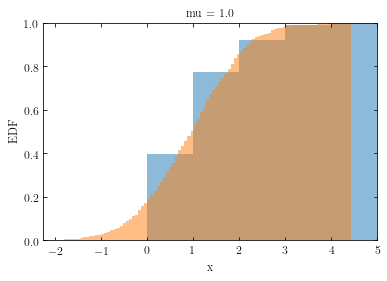

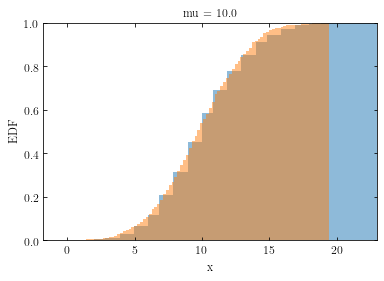

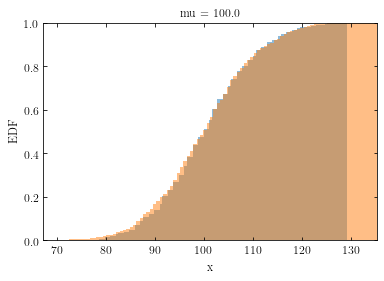

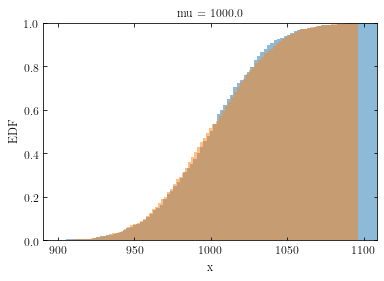

In [69]:
from scipy.stats import poisson, norm
def compPoissonNormal(mu, size):
    fig, ax = plt.subplots();
    rvP = poisson(mu)
    rvN = norm(mu, np.sqrt(mu))
    Pvs = rvP.rvs(size = size)
    Nvs = rvN.rvs(size = size)
    print("Poisson:", np.average(Pvs), np.std(Pvs)**2)
    print("Normal:", np.average(Nvs), np.std(Nvs)**2)
                 
    ax.hist(Pvs, bins = 100, normed = True, alpha = 0.5, cumulative = True, lw = 0)
    ax.hist(Nvs, bins = 100, normed = True, alpha = 0.5, cumulative = True, lw = 0)
    
    ax.set_xlabel("x")
    ax.set_ylabel("EDF")
    ax.set_title("mu = %.1f" % mu)
    
compPoissonNormal(1, 1000)
compPoissonNormal(10, 1000)
compPoissonNormal(100, 1000)
compPoissonNormal(1000, 1000)

## Complete spatial randomness (CSR)

**Complete spatial randomness (CSR)** is a **stationary Poisson process** where **$\lambda$ is constant** across space

## Inhomogeneous Poisson point process
An **inhomogeneous Poisson point process** occurs when $\lambda({\bf x})$ varies with location

## Marked point process
A **marked point process** is spatial data with associated non-spatial variables (*e.g. luminosity*)

# Uniformity tests

## G test

* Complete spatial randomness (CSR) hypotesis testing: compare **nearest-neighbor** empirical distribution function $G(r)$

* The CSR distribution for a two-dimensional area A and for large $n$ is: 
$$ \Large G_{CSR}(r) = 1 - e^{-\pi n r^2 / A}$$


* simulations needed for edge effects and small $n$.

Build a two dimensional CSR sample and perform an uniformity G test.

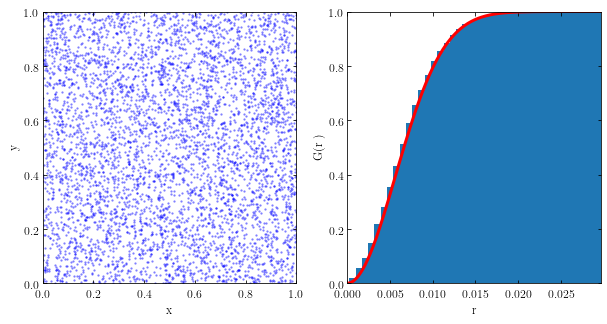

In [70]:
n = 5000
(x, y) = (np.random.random([n]), np.random.random([n]))

def Gtest(x, y, A):

    # find nearest neighbor distance
    nnG = np.array(list(map(lambda i: min(np.sqrt((np.delete(x, i) - x[i])**2
        + (np.delete(y, i) - y[i])**2)), range(len(x)))))
    
    # do scatter plot and compare e.d.f. with CSR

    fig, ax = plt.subplots(ncols=2, figsize = (10, 5))
    ax[0].scatter(x, y, marker = '.', lw = 0, alpha = 0.5); ax[0].set_xlabel('x'); ax[0].set_ylabel('y'); 
    ax[0].set_xlim(0,1); ax[0].set_ylim(0,1);
    ax[1].hist(nnG, cumulative = True, density = True, bins = 40, lw  = 0);

    r = np.linspace(0, 1, 10000);
    ax[1].plot(r, 1.- np.exp(-np.pi * n * r**2 / A), lw = 3, c = 'r'); 
    ax[1].set_xlabel('r'); ax[1].set_ylabel('G(r  )');
    ax[1].set_xlim(0, max(nnG));

    return nnG

nnG = Gtest(x, y, 1)

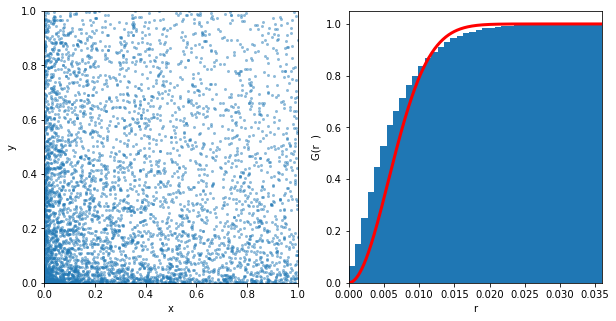

In [4]:
# non-CSR case

x2 = x**2; y2 = y**2;
nnG2 = Gtest(x2, y2, 1)

## F test

* similar to $G(r)$, but using distance from set of random locations

Build a two dimensional CSR sample and perform an uniformity F test.

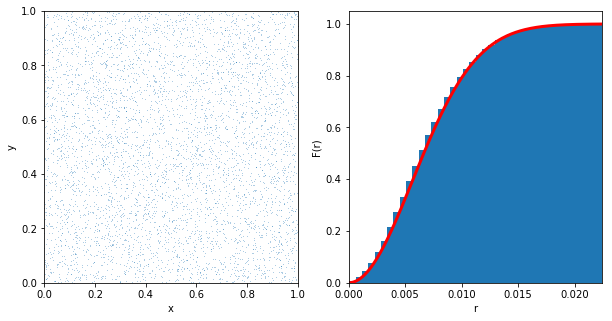

In [5]:
n = 5000
(x, y) = (np.random.random([n]), np.random.random([n]))

def Ftest(x, y, ntest):

    nnF = np.array(list(map(lambda i: min(np.sqrt((x - np.random.random())**2
        + (y - np.random.random())**2)), range(ntest))))
    
    fig, ax = plt.subplots(ncols=2, figsize = (10, 5))
    ax[0].scatter(x, y, marker = '.', lw = 0, alpha = 0.5, s = 2); ax[0].set_xlabel('x'); ax[0].set_ylabel('y'); 
    ax[0].set_xlim(0,1); ax[0].set_ylim(0,1);
    ax[1].hist(nnF, cumulative = True, normed = True, bins = 40, lw  = 0);

    r = np.linspace(0, 1, 10000);
    ax[1].plot(r, 1.- np.exp(-np.pi * np.size(x) * r**2), lw = 3, c = 'r'); 
    ax[1].set_xlabel('r'); ax[1].set_ylabel('F(r)');
    ax[1].set_xlim(0, max(nnF));
    
    return nnF
    
nnF = Ftest(x, y, 10000)

# Spatial autocorrelation

## Global spatial autocorrelation

An unbiased maximum-likelihod estimator of $\lambda$ for a stationary Poisson point-process is:
$$\hat{\lambda} = \frac{n}{\nu_p}$$

## Moran's $I$ and Geary's contiguity ratio $c$

* Two localized, weighted correlation coefficients designed to detect departures from CSR
* Correlation is weighted with distance according to some kernel $w$:
\begin{align}
I(d) &= \frac{1}{W(d)} \frac{\sum_{i, j, i \ne j} w_{ij}(d) (m_i - \bar{m}) (m_j - \bar{m})}
{\frac{1}{n} \sqrt{\sum_{i = 1}^n (m_i - \bar{m})^2}} \\
c(d) &= \frac{1}{2 W(d)} \frac{\sum_{i, j, i \ne j} w_{ij}(d) (m_i - m_j)^2}
{\frac{1}{n - 1} \sqrt{\sum_{i = 1}^n (m_i - \bar{m})^2}}
\end{align}
where $m_i$ gives the count of objects in the $i$-th bin, $\bar{m}$ is the global mean bin count, $w_{ij}(d)$ is the matrix of weights and $W(d)$ is the sum of the $w_{ij}$ elements.

* Plots of $I(d)$ against distance scale $d$ are called **correlograms**
* Expected values of $I(d)$ and $c(d)$ for normal noise and no autocorrelation:
    * $E(I) = \frac{-1}{n - 1} \to 0$ for large $n$
    * $E(c) = 1$
* When spatial autocorrelation is strong, Moran's $I$ approaches 1 and Geary's $c$ approaches 0.

pip install libpysal

pip install esda

## Moran's I

*Case study*: homicide rates for a group of 78 counties surrounding St. Louis over the period 1988-93.

In [71]:
# pysal
import pysal
import libpysal
# read homicide rates from 1988 to 1993
f = libpysal.io.open(libpysal.examples.get_path("stl_hom.txt"))

y = np.array(f.by_col['HR8893'])
# load weights (1 if they share boundary, 0 if not)
w = libpysal.io.open(libpysal.examples.get_path("stl.gal")).read()

See weighting schemes in here:

* http://pysal.readthedocs.io/en/latest/users/tutorials/weights.html

* http://www.seas.upenn.edu/~ese502/lab-content/extra_materials/SPATIAL%20WEIGHT%20MATRICES.pdf

In [72]:
from esda.moran import Moran
from esda.geary import Geary

In [73]:
mi = Moran(y, w, two_tailed=False)
help(mi)

Help on Moran in module esda.moran object:

class Moran(builtins.object)
 |  Moran(y, w, transformation='r', permutations=999, two_tailed=True)
 |  
 |  Moran's I Global Autocorrelation Statistic
 |  
 |  Parameters
 |  ----------
 |  
 |  y               : array
 |                    variable measured across n spatial units
 |  w               : W
 |                    spatial weights instance
 |  transformation  : string
 |                    weights transformation,  default is row-standardized "r".
 |                    Other options include "B": binary,  "D":
 |                    doubly-standardized,  "U": untransformed
 |                    (general weights), "V": variance-stabilizing.
 |  permutations    : int
 |                    number of random permutations for calculation of
 |                    pseudo-p_values
 |  two_tailed      : boolean
 |                    If True (default) analytical p-values for Moran are two
 |                    tailed, otherwise if False, they a

In [74]:
# print I, expected value, standard deviation under normality assumption
print(mi.I, mi.EI, mi.seI_norm)
# p-value under normality assumption
print(mi.p_norm)

0.24365582621771695 -0.012987012987012988 0.0704850286239292
0.00013573931385468807


## Geary's c

In [75]:
gc = Geary(y, w)
help(gc)

Help on Geary in module esda.geary object:

class Geary(builtins.object)
 |  Geary(y, w, transformation='r', permutations=999)
 |  
 |  Global Geary C Autocorrelation statistic
 |  
 |  Parameters
 |  ----------
 |  y              : array
 |                   (n, 1) attribute vector
 |  w              : W
 |                   spatial weights
 |  transformation : {'R', 'B', 'D', 'U', 'V'}
 |                   weights transformation, default is row-standardized.
 |                   Other options include "B": binary, "D":
 |                   doubly-standardized, "U": untransformed (general
 |                   weights), "V": variance-stabilizing.
 |  permutations   : int
 |                   number of random permutations for calculation of
 |                   pseudo-p_values
 |  
 |  Attributes
 |  ----------
 |  y              : array
 |                   original variable
 |  w              : W
 |                   spatial weights
 |  permutations   : int
 |                   number 

In [76]:
# print I, expected value, standard deviation under normality assumption
print(gc.C, gc.EC, np.sqrt(gc.VC_rand))
# p-value under normality assumption
print(gc.p_norm)

0.597128215893689 1.0 0.11429672039121211
2.528454742216035e-08


# Test on GAIA catalogue of stars

GAIA catalogue
http://gea.esac.esa.int/archive/

Astropy to read Virtual Observatory Tables (VOT)
http://www.astropy.org/

In [77]:
from astropy.table import Table

T = Table.read("test_GAIA.vot", format='votable')

In [78]:
print(T.keys())

['solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac', 'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac', 'astrometric_delta_q', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_primary_flag', 'astrometric_relegation_factor', 'astrometric_weight_al', 'astrometric_weight_ac', 'astrometric_priors_used', 'matched_observations', 'duplicated_source', 'scan_direction_strength_k1', 'scan_direction_strength_k2', 'scan_direction_strength_k3', 'scan_direction_strength_k4', 'scan_direction_mean_k1', 'scan_direction_mean_k2', 'scan_direction_mean_k3', 'scan_directio

We cannot run our F test routine on a circular area because it simulates points in a squared area, therefore we force our area to be squared and of dimensions 1 x 1

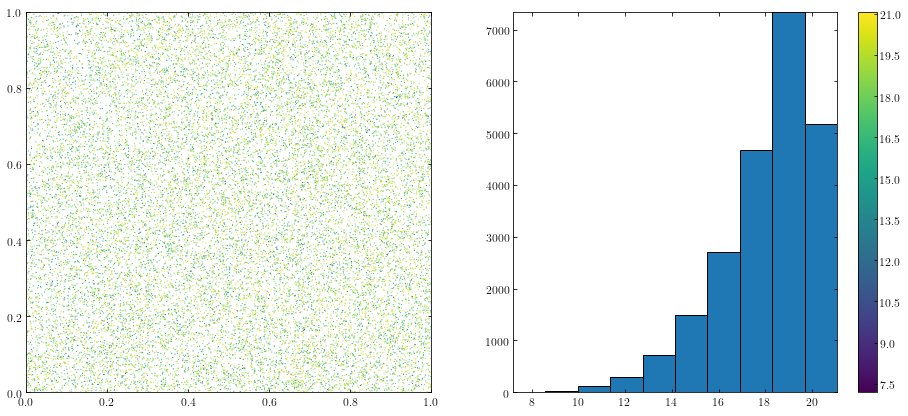

In [79]:
# sql string
ra = 11 * 15 # 11 hr
dec = -5 # -5 deg
radius = 2 # 2 deg
GAIA_ra = T['ra']
GAIA_dec = T['dec']
GAIA_g = T['phot_g_mean_mag']
fig, ax = plt.subplots(ncols = 2, figsize = (16, 7))
mask = (np.abs(GAIA_ra - ra) < radius / np.sqrt(2)) & (np.abs(GAIA_dec - dec) < radius / np.sqrt(2))
GAIA_ra = GAIA_ra[mask]
GAIA_dec = GAIA_dec[mask]
GAIA_g = GAIA_g[mask]
xGAIA = np.array((GAIA_ra - min(GAIA_ra)) / (max(GAIA_ra) - min(GAIA_ra)))
yGAIA = np.array((GAIA_dec - min(GAIA_dec)) / (max(GAIA_dec) - min(GAIA_dec)))
cax = ax[0].scatter(xGAIA, yGAIA, c = GAIA_g, marker = '.', lw = 0, s = 5)
plt.colorbar(cax)
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
_ = ax[1].hist(GAIA_g)

/home/fforster/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


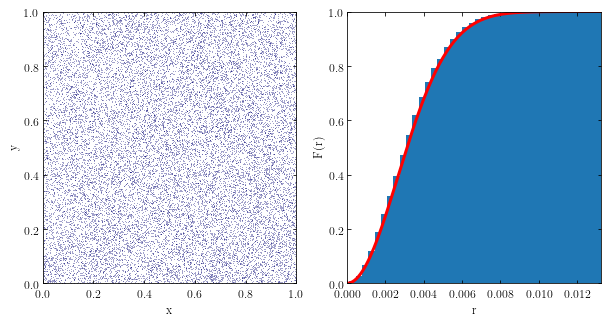

In [80]:
_ = Ftest(xGAIA, yGAIA, 1000)

It appears that the stars in this region of the GAIA catalogue follow a CSR distribution

Let's now try a catalogue of galaxies

http://magnum.anu.edu.au/~TDFgg/

![alt text](2dFzcone.gif "2dF")

(-7.499777777777778, 2.4999722222222225)

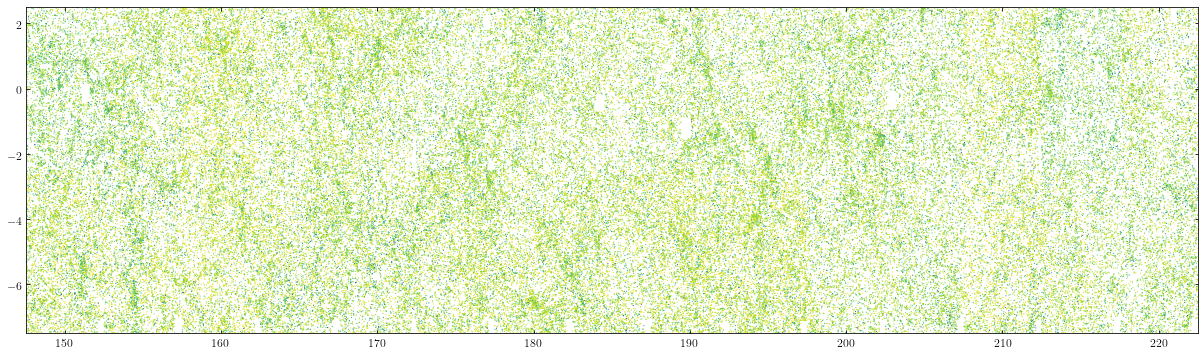

In [81]:
#(rahh, ramm, rass, decdd, decmm, decss, z2df) = np.loadtxt("best.observations.idz", usecols = (10,11, 12, 13, 14, 15, 20), dtype = str).transpose()
(rahh, ramm, rass, decdd, decmm, decss, mag2df) = np.loadtxt("ngp.cat", usecols = (1, 2, 3, 4, 5, 6, 7), dtype = str).transpose()
ra2df = (np.array(rahh, dtype = float) + (np.array(ramm, dtype = float) + np.array(rass, dtype = float) / 60.) / 60.) * 15.
neg = np.array(list(map(lambda x: x[0] == '-', decdd)))
dec2df = (np.abs(np.array(decdd, dtype = float)) + (np.array(decmm, dtype = float) + np.array(decss, dtype = float) / 60.) / 60.)
dec2df[neg] = -dec2df[neg]
mag2df = np.array(mag2df, dtype = float)
fig, ax = plt.subplots(figsize = (21, 6))
ax.scatter(ra2df, dec2df, c = mag2df, marker = '.', s = 5, lw = 0, alpha = 1)
ax.set_xlim(min(ra2df), max(ra2df))
ax.set_ylim(min(dec2df), max(dec2df))

/home/fforster/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


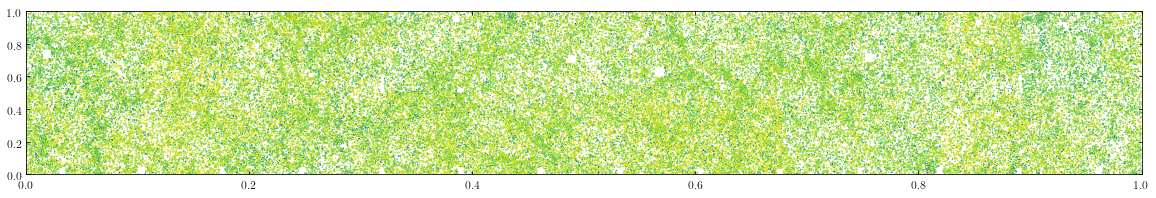

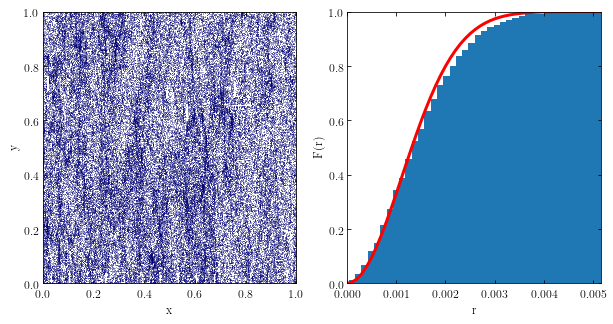

In [82]:
mask = (ra2df > 150) & (ra2df < 220)
ra2df = ra2df[mask]
dec2df = dec2df[mask]
mag2df = mag2df[mask]
x2df = (ra2df - min(ra2df)) / (max(ra2df) - min(ra2df))
y2df = (dec2df - min(dec2df)) / (max(dec2df) - min(dec2df))
fig, ax = plt.subplots(figsize = (20, 3))
ax.scatter(x2df, y2df, c = mag2df, marker = 'o', s = 2, lw = 0, alpha = 1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
nn2df = Ftest(x2df, y2df, 1000)

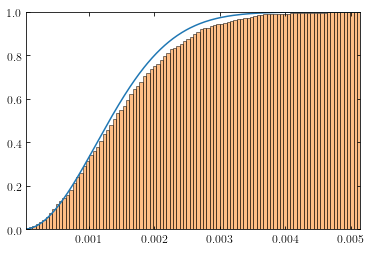

In [83]:
nn2df = np.sort(np.array(nn2df))
def cdfCSR(r):
    return 1.- np.exp(-np.pi * np.size(x2df) * r**2)
fig, ax = plt.subplots()
ax.plot(nn2df, cdfCSR(nn2df))
ax.hist(nn2df, density = True, cumulative = True, alpha = 0.5, bins = 100);

In [84]:
from scipy.stats import kstest
ks = kstest(nn2df, cdfCSR)
print(ks)

KstestResult(statistic=0.06431719322760365, pvalue=0.0004861639862525868)


Even in the 2D distribution of galaxies we can detect deviations from CSR

### Variogram

* Sometimes a vector instead of a scalar is better for measuring the autocorrelation at different scales, which is not given by $I$ or $c$

* The **variogram** or **semi-variogram** is used to map the variance on different scales:
$$ \large \gamma(d) = \frac{1}{2 m(d)} \sum_{j = 1}^{m(d)} [z({\bf x}_j) - z({\bf x}_j + d)]^2$$
where the sum if over $m(d)$ pairs of points which are at a distance $d$ from each other, and $z$ is the marked variable measured at location ${\bf x}$

* The **variogram** is a vector indicating the strength of the autocorrelation at different distance scales, which gives more information than a scalar measure like $I$ or $c$.

* In Astrophysics the interest is usually on the dispersion, or variance, of a mapped quantity, e.g. spatial fluctuations in brightness and velocity on different physical scales are related to the dynamical state of a turbulent molecular cloud

* Mathematically, it describes the second-moment properties of a spatial process $S({\bf x})$.

$$ \large V({\bf x}_i, {\bf x}_j) = \frac{1}{2} var[S({\bf x}_i) - S({\bf x}_j)]$$

* For a stationary, isotropic, Gaussian spatial process, the variogram simplifies to

$$V(d) = \sigma^2 [1 - \rho(d)]$$
where
$$\rho = \frac{cov[S({\bf x}_i, S({\bf x}_j)]}{\sigma^2}$$

![alt text](Variogram.gif "2dF")

* **Nugget**: variations smaller than the mininum separation of measured points

* **Sill**: Total variance, asymptotic value of the variogram. 

* **Range**: Distance at which the variogram asymptotes to a constant value

* $\gamma$ should converge for stationary processes. If it converges to different values for different directions it indicates anistotropies.


See http://nbviewer.jupyter.org/github/cjohnson318/geostatsmodels/blob/master/notebooks/VariogramAnalysis.ipynb

# Spatial interpolation

* The most common method for interpolation of **marked spatial data** in the geosciences is **kriging**.

* Continuous surfaces of the mark variable are derivd from discrete data, either evenly or unevenly spaces, by interpolating using the **variogram**

* For a stationary Gaussian spatial process, kriging gives the minimum mean square error (MSE) predictor for the unobserved distribution

* Initially used to estimate the most likely distribution of gold based on samples from a few boreholes (Daniel G. Krige), theoretical basis developed by Georges Matheron. Very similar to Gaussian process interpolation (see history here https://www.youtube.com/watch?v=4r463NLq0jU&feature=youtu.be&t=26s)

## Ordinary kriging

* We look for the weights $\lambda_i$ at each i = 1..n points in the dataset that give an unbiased estimator of the continuous response variable $z$ from the measurements $z_i$ of the location vector $x$

$$\large \hat{z}({\bf x}) = \sum_{i = 1}^{n} \lambda_i z({\bf x}_i)$$

* The weights, normalized so that $\sum_i \lambda = 1$, are derived from the variogram $\gamma$ emphasizing distances within the range of each data point. They are chosen to minimize the variance:

$$\large \hat{\sigma^2}({\bf x}) = E[(\hat{Z}({\bf x}) - Z({\bf x})^2]$$
$$ \large = 2 \sum_{i = 1}^{n} \lambda_i \gamma({\bf x}_i - {\bf x}_0) - \sum_{i = 1}^n \sum_{j = 1}^n \gamma({\bf x}_i - {\bf x}_j)$$

where $\gamma$ is the variogram and ${\bf x}_0$ is some point chosen to be the origin.

* The $\lambda$ coefficients are traditionally found using the method of Lagrange multipliers (https://en.wikipedia.org/wiki/Lagrange_multiplier)

* This technique allows the estimation of localized errors in the interpolated map

From Feigelson & Babu: 
![alt text](krigingA.png "2dF")
![alt text](krigingB.png "2dF")

See
http://nbviewer.jupyter.org/github/cjohnson318/geostatsmodels/blob/master/notebooks/KrigingExample.ipynb


# Global functions of Clustering

## Cumulative second order measures

* Let's recall the distribution of distances to neighboring points give a measure of local density, which leads to two different global measures of clustering:

    * $\Large G(d) = \frac{\# d_{NN}({\rm s_i})~ <~ d}{n}$
    
    * $\Large F(d) = \frac{\# d_{NN}({\rm p_i})~ <~ d}{n}$
    
which are the cumulative distribution of nearest-neighbor (NN) distances either from the data point locations (${\rm s_i}$ for G) or a set of randomly chosen locations (${\rm p_i}$ for F).

* Generally speaking, F is more sensitive for weakly clustered processes, while G is more sensititive for strongly clustered processes.

### Ripley's K function

* The most widely used global measure of clustering

* Typically defined as the average number of points within distance $d$ of the observed points divided by the process intensity $\lambda$:

$$\Large K(d) = \frac{1}{\hat{\lambda} n} \sum_{i=1}^{n} \#[S \in C({\rm s_i}, d)]$$

where $C$ denotes a circle of radius $d$ centered on the data point locations ${\rm s_i}$

* For a two-dimensional homogeneous Poisson process $K(d)$ increases quadratically with $d$ and $\lambda = n/a$, where $a$ is the survey area

### Besag's L* function

* A different way of writing K(d) to stabilize the variance

$$\Large L^*(d) = \sqrt{\frac{K(d)}{\pi}} - d$$

in two dimensions, and $L^* \propto K^{1/p}$ in $p$ dimensions.

* $L^*$ contains the same information as $K$, but a plot of $L^*$ is more horizontal and the variance is constant with $d$ for a homogeneous Poisson process.

For CSR, a homogeneous Poisson process with intensity $\lambda$, the three spatial autocorrelation functions have expected values:

$$\Large E[G(d)] = E[F(d)] = 1 - e^{-\lambda \pi d^2} \\
\Large E[K(d)] = \pi d^2 \\
\Large E[L^*(d)] = 0
$$

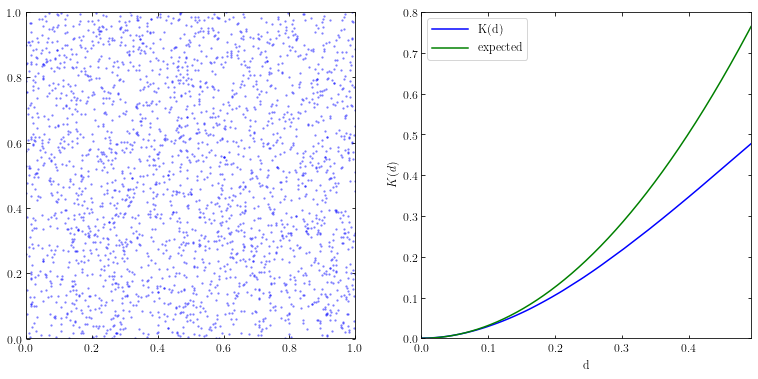

In [85]:
# Ripley's K
def K(x, y, A, doplot = False):
    
    dxy = np.array(list(map(lambda i: np.sqrt((x - x[i])**2 + (y - y[i])**2), range(np.size(x)))))
    dxy = np.sort(dxy.flatten())
    kxy = np.array(range(len(dxy))) / (np.size(x) / A) / np.size(x)
    
    if doplot:
        fig, ax = plt.subplots(ncols = 2, figsize = (13, 6))
        ax[0].scatter(x, y, lw = 0, marker = '.', alpha = 0.5)
        ax[0].set_xlim(min(x), max(x))
        ax[0].set_ylim(min(y), max(y))
        ax[1].plot(dxy, kxy, c = 'b', label = 'K(d)')
        ax[1].plot(dxy, np.pi * dxy**2, c = 'g', label = 'expected')
        ax[1].set_xlim(0, max(dxy) / np.sqrt(2) / 2.)
        ax[1].set_ylim(0, 0.8)
        ax[1].set_xlabel('d')
        ax[1].set_ylabel('$K(d)$')
        ax[1].legend(loc = 2)
    
    return (dxy, kxy)

n = 2500
(x, y) = (np.random.random(n), np.random.random(n))
(dxy, Kxy) = K(x, y, 1., True)

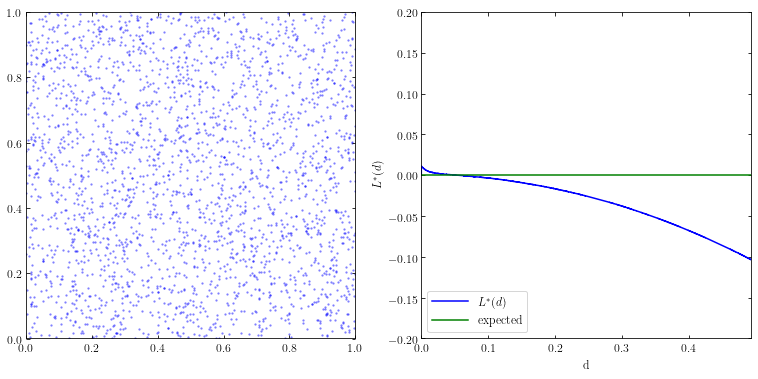

In [86]:
# Besag's L
def Lstar(x, y, A, doplot = False):
    
    (dxy, kxy) = K(x, y, A)
    Lstar = np.sqrt(kxy / np.pi) - dxy
    
    if doplot:
        fig, ax = plt.subplots(ncols = 2, figsize = (13, 6))
        ax[0].scatter(x, y, lw = 0, marker = '.', alpha = 0.5)
        ax[0].set_xlim(min(x), max(x))
        ax[0].set_ylim(min(y), max(y))
        ax[1].plot(dxy, Lstar, c = 'b', label = '$L^*(d)$')
        ax[1].axhline(0, c = 'g', label = 'expected')
        ax[1].set_xlim(0, max(dxy) / np.sqrt(2) / 2.)
        ax[1].set_ylim(-0.2, 0.2)
        ax[1].set_xlabel('d')
        ax[1].set_ylabel('$L^*(d)$')
        ax[1].legend(loc = 3)
    return (dxy, Lstar)

(dxy, Lstarxy) = Lstar(x, y, 1., True)

* **Deviations from expected values are due to edge effects.**
* Note that there are not as many points near the corner or edges as to points near the central areas.
* Normalize via Montecarlo simulations or correct by tested area vs circle area ratio around each point

### Lieshout-Baddeley $J$ function:

Comparison between inter-event distances G to distances from a fixed point F

$$\Large J(r) = \frac{1-G(r)}{1-F(r)}$$

* J has been shown to be highly resistant to edge effects while still sensitive to clustering structure

* For CSR, $J(r) = 1$, but the converse is not always true

* $J(r) < 1$ indicate clustering and $J > 1$ indicate spatial repulsion

* It inherits the advantages of both $F$ and $G$ for weak and strong clustering processes

/home/fforster/anaconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/fforster/anaconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


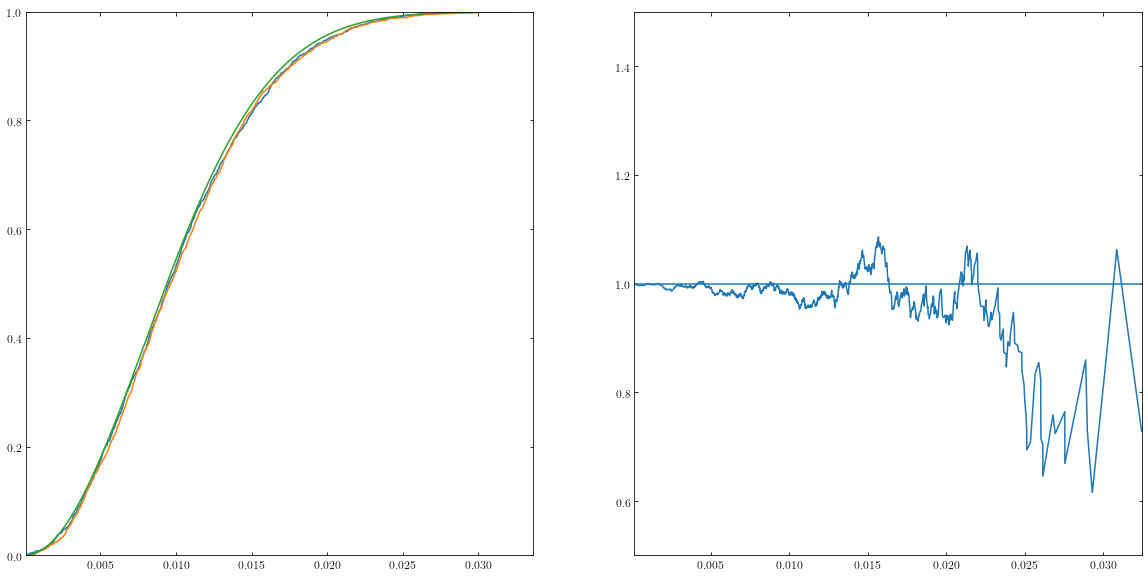

In [87]:
# Lieshout-Baddeley J
def J(x, y, A, doplot = False):
    
    # sorted between point distances
    nnG = np.array(sorted(list(map(lambda i: min(np.sqrt((np.delete(x, i) - x[i])**2
        + (np.delete(y, i) - y[i])**2)), range(len(x))))))
    
    # sorted distances to random points
    nnF = np.array(sorted(list(map(lambda i: min(np.sqrt((x - np.random.random())**2
        + (y - np.random.random())**2)), range(len(x))))))
    
    # build interpolating function for nnG and nnF
    nnGf = interp1d(nnG, np.arange(len(nnG)) / len(nnG), bounds_error = False, fill_value = 'extrapolate')
    nnFf = interp1d(nnF, np.arange(len(nnF)) / len(nnF), bounds_error = False, fill_value = 'extrapolate')
    
    # plot
    fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))
    ax[0].plot(nnG, nnGf(nnG))
    ax[0].plot(nnF, nnFf(nnF))
    ax[0].plot(nnG, 1.- np.exp(-np.pi * np.size(x) * nnG**2))
    
    ax[1].plot(nnG, (1. - nnGf(nnG)) / (1. - nnFf(nnG)))
    ax[1].set_ylim(0.5, 1.5)
    ax[1].axhline(1.)
    

J(x, y, 1., True)

/home/fforster/anaconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/fforster/anaconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


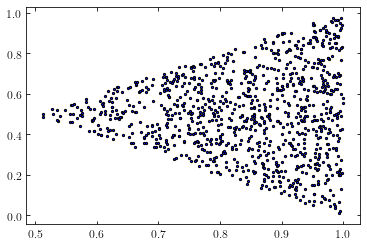

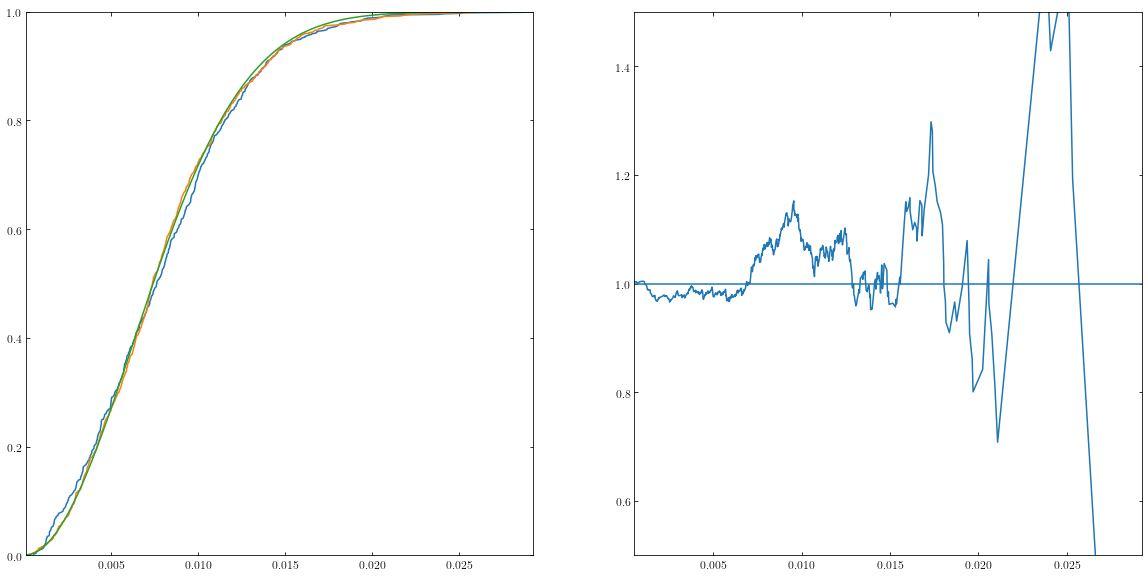

In [88]:
n = 4000
(x, y) = (np.random.random(n), np.random.random(n))
mask = (x > (1. - y)) & (y < x) # 1/4th of the square
fig, ax = plt.subplots()
ax.scatter(x[mask], y[mask], marker = '.')

# Lieshout-Baddeley J
def Jmask(x, y, A, doplot = False):
    
    # sorted between point distances
    nnG = np.array(sorted(list(map(lambda i: min(np.sqrt((np.delete(x, i) - x[i])**2
        + (np.delete(y, i) - y[i])**2)), range(len(x))))))
    
    # sorted distances to random points
    x2, y2 = (np.random.random(n), np.random.random(n))
    mask2 = (x2 > (1. - y2)) & (y2 < x2)
    nnF = np.array(sorted(list(map(lambda i: min(np.sqrt((x - x2[mask2][i])**2
        + (y - y2[mask2][i])**2)), range(sum(mask2))))))
    
    # build interpolating function for nnG and nnF
    nnGf = interp1d(nnG, np.arange(len(nnG)) / len(nnG), bounds_error = False, fill_value = 'extrapolate')
    nnFf = interp1d(nnF, np.arange(len(nnF)) / len(nnF), bounds_error = False, fill_value = 'extrapolate')
    
    # plot
    fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))
    ax[0].plot(nnG, nnGf(nnG))
    ax[0].plot(nnF, nnFf(nnF))
    ax[0].plot(nnG, 1.- np.exp(-np.pi * np.size(x) * nnG**2 / A))
    
    ax[1].plot(nnG, (1. - nnGf(nnG)) / (1. - nnFf(nnG)))
    ax[1].set_ylim(0.5, 1.5)
    ax[1].axhline(1.)
    

Jmask(x[mask], y[mask], 0.25, True)

### Clustering interactions

* It is also possible to measure clustering strength between two or more populations in a survey

* For example, we can use counts of one population around points of a second population:

$$\Large L_{12}^*(d) = \sqrt{\frac{n_2 K_{12}(d) + n_1 K_{21}(d)}{\pi (n_1 + n_2)}} - d$$

* This will give positive values where the two populations are segregated, negative where they are aggregated, and zero where they have no interaction.

* e.g. study the distribution of elliptical and spiral galaxies in rich clusters

## Two-point correlation function

* The two-point correlation function counts the number of objects in annuli around each point rather than counts within circles around each point

* It is related to the differential of the Ripley $K$ function

* Astronomers use almost exclusively the two-point correlation function for galaxy clustering studies.

The two-point correlation function is derived from the joint probability $P_{12}$ that two objects in a spatial point process lie in infinitesimal spheres of volume $dV_1$ and $dV_2$ around two vector locations ${\bf x}_1$ and ${\bf x}_2$:

$$ \Large dP_{12} = \lambda_2({\bf x}_1, {\bf x}_2)~ dV_1~ dV_2$$

where $\lambda_2$ is the second-order product density of the process. 

* In astronomy the two-point correlation function $\xi({\bf d})$ is a function of vectorial distances $\bf d$ between ${\bf x}_1$ and ${\bf x}_2$. It treats $\lambda_2$ as the sum of two components: a uniform process with volume density $\bar{\rho}$ and other a correlated process:

$$\Large dP_{12} = \bar{\rho}^2 [1 + \xi({\bf d})] dV_1 dV_2$$

* $\xi({\bf d})$ measures the **covariance** of the non-uniform structure of the point distribution.

* In most studies the process is assumed to be stationary and isotropic, which gives:

$$\Large \xi(d) = \frac{\lambda_2(d)}{\bar{\rho}^2} - 1 $$

* In statistics $\xi(d) + 1$ is called the **pair correlation function**, which is the differential of Ripley's $K$ function:

$$ \Large \xi(d) + 1 = \frac{K'(d)}{p \nu_p d^{p - 1}} = \frac{K'(d)}{2 \pi d}~~~~{\rm for}~~p=2$$

* while $\xi$ is computed in annuli specified by the scientist, $K$ is computed for all distances $d$ without binning

* the two-point correlation contains the same information as the $K$ function and it is not widely used by statisticians or scientists in other fields, largely because it is a differential rather than cumulative estimator, i.e. it requires binning.

* Illian et al. 2008: *while the two-point correlation contains the same statistical information as the $K$ or $L$ functions, it offers the information in a way that it is easier to understand, in particular for beginners*

### Methods to compute $\xi(d)$

* Methods combine the concepts of the $G$ and $F$ functions, which measure points around measured points and around random locations, respectively

* They use Montecarlo simulations of CSR distributions

* Simulation can include complicated selection effects such as magnitude limits convolved with the galaxy luminosity function, redshifted spectra or intrinsic color evolution

#### **Peebles-Hause (1974)**: 

$$ \Large \hat{\xi_{PH}} = \biggl( \frac{n_{\rm CSR}}{n} \biggr)^2 \frac{DD(d)}{RR(d)} - 1$$

where $DD(r)$ and $RR(d)$ are the number of points around observed or CSR simulated points, respectively, where $n_{\rm CSR} \gg n$, and where the counts are obtained in annuli ($d$, $d$ + $\Delta d$) around each location. Note that replacing $\biggl(\frac{n_{\rm CSR}}{n}\biggr)^2$ for $\frac{n_{\rm CSR} (n_{\rm CSR} - 1)}{n (n - 1)}$ makes the estimator unbiased for a Poisson process.

#### **Davis-Peebles (1983)**:

$$ \Large \hat{\xi_{DP}} = \frac{n_{\rm CSR}}{n} \frac{DD(d)}{DR(d)} - 1$$

where $DR(d)$ is the number of pairs between the observed and simulated CSR distributions in the ($d$, $d$ + $\Delta d$) annulus

#### **Hamilton (1993)**:

$$ \Large \hat{\xi_{H}} = \frac{DD(d)~ RR(d)}{DR(d)^2} - 1$$

#### **Landy-Szalay (1993)**:

$$ \Large \hat{\xi_{LS}} = 1 + \biggl( \frac{n_{\rm CSR}}{n} \biggr)^2 \frac{DD(d)}{RR(d)} - 2 \frac{n_{\rm CSR}}{n} \frac{DR(d)}{RR(d)}$$

* These estimators can be extended to higher orders, such as the three point correlation function

* The variance of the two-point correlation estimator is often estimated with a normal approximation:

$$ \Large \hat{var}[\xi(d)] = \frac{[1 + \xi(d)]^2}{DD(d)}$$

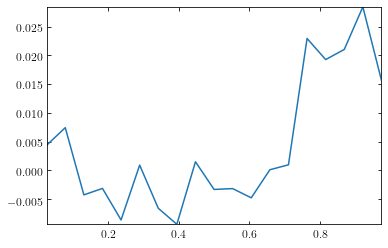

In [89]:
from astroML.correlation import two_point
np.random.seed(0)
X = np.random.random((1000, 2))
bins = np.linspace(0, 1, 20)
corr = two_point(X, bins)
np.allclose(corr, 0, atol=0.02)
fig, ax = plt.subplots()
ax.plot((bins[:-1] + bins[1:]) / 2., corr)

<ErrorbarContainer object of 3 artists>

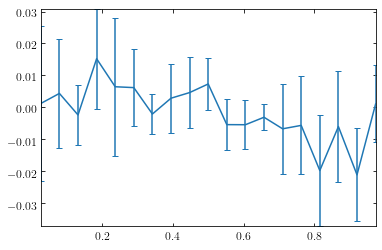

In [90]:
from astroML.correlation import bootstrap_two_point
corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap=5)
np.allclose(corr, 0, atol=2 * dcorr)
fig, ax = plt.subplots()
ax.errorbar((bins[:-1] + bins[1:]) / 2., corr, yerr = dcorr)

In [91]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

In [92]:
#------------------------------------------------------------
# Get data and do some quality cuts
data = fetch_sdss_specgals()
m_max = 17.7

# redshift and magnitude cuts
data = data[data['z'] > 0.08]
data = data[data['z'] < 0.12]
data = data[data['petroMag_r'] < m_max]

# RA/DEC cuts
RAmin, RAmax = 140, 220
DECmin, DECmax = 5, 45
data = data[data['ra'] < RAmax]
data = data[data['ra'] > RAmin]
data = data[data['dec'] < DECmax]
data = data[data['dec'] > DECmin]

ur = data['modelMag_u'] - data['modelMag_r']
flag_red = (ur > 2.22)
flag_blue = ~flag_red

data_red = data[flag_red]
data_blue = data[flag_blue]

print("data size:")
print("  red gals: ", len(data_red))
print("  blue gals:", len(data_blue))

data size:
  red gals:  38017
  blue gals: 16883


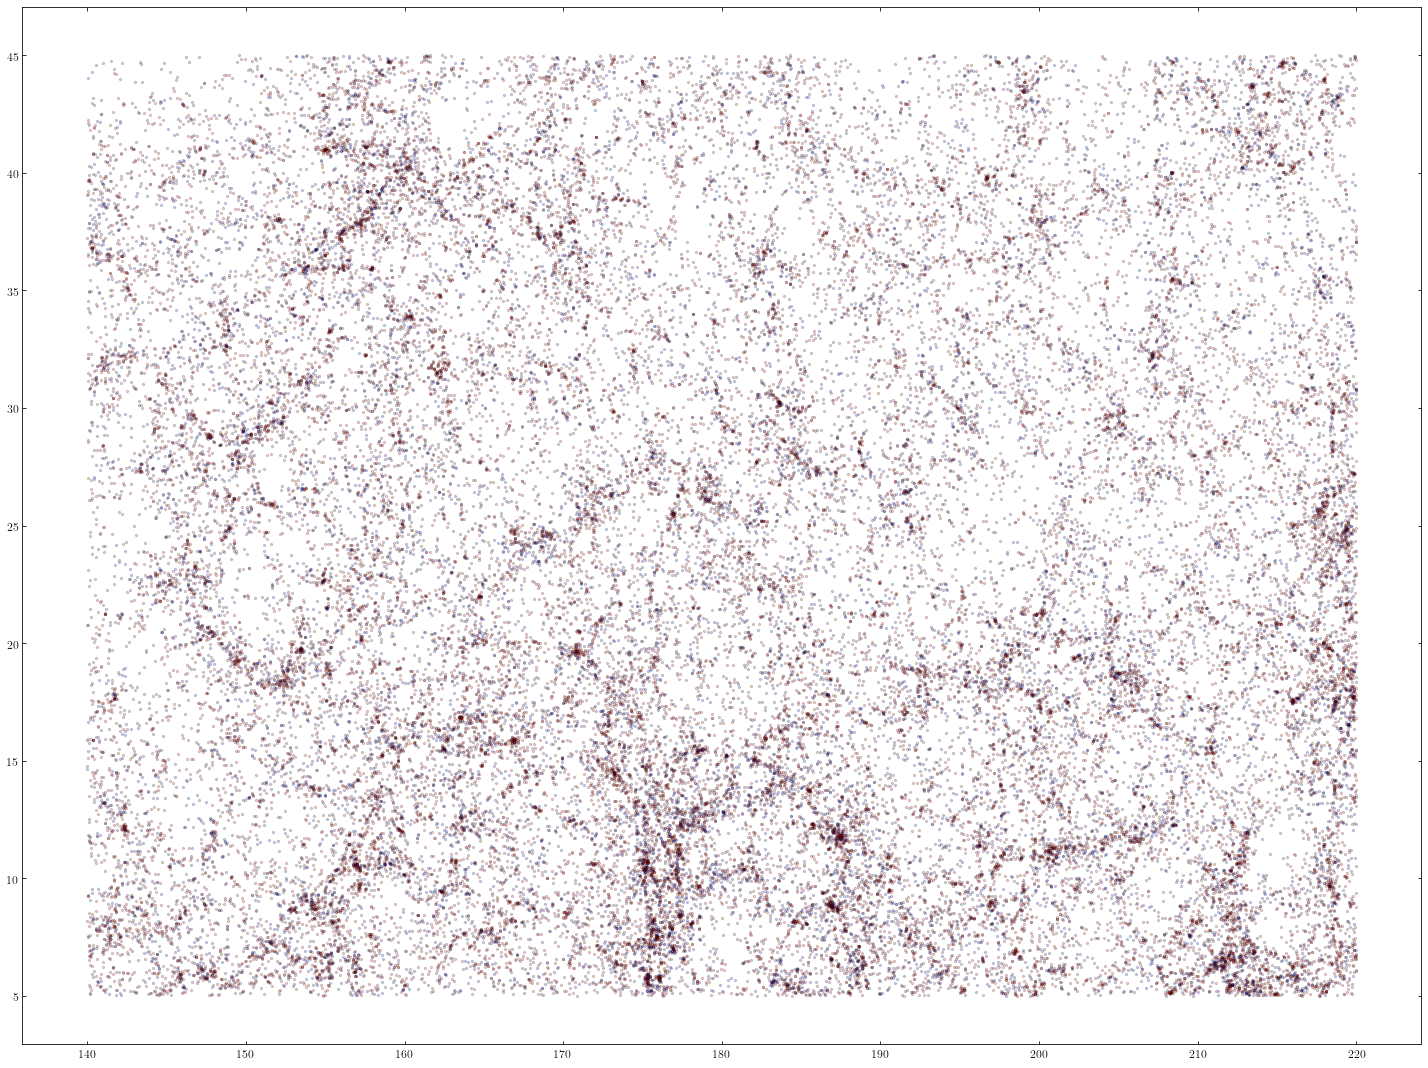

In [93]:
fig, ax = plt.subplots(figsize = (20, 15))
ax.scatter(data_red['ra'], data_red['dec'], marker = '.', alpha = 0.2, c = 'r')
ax.scatter(data_blue['ra'], data_blue['dec'], marker = '.', alpha = 0.2, c = 'b')
plt.tight_layout()

In [94]:
#------------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
@pickle_results("correlation_functions.pkl")
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)

    results = [bins]
    for D in [data_red, data_blue]:
        results += bootstrap_two_point_angular(D['ra'],
                                               D['dec'],
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=Nbootstraps)

    return results

In [96]:
(bins, r_corr, r_corr_err, r_bootstraps,
 b_corr, b_corr_err, b_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

@pickle_results: using precomputed results from 'correlation_functions.pkl'


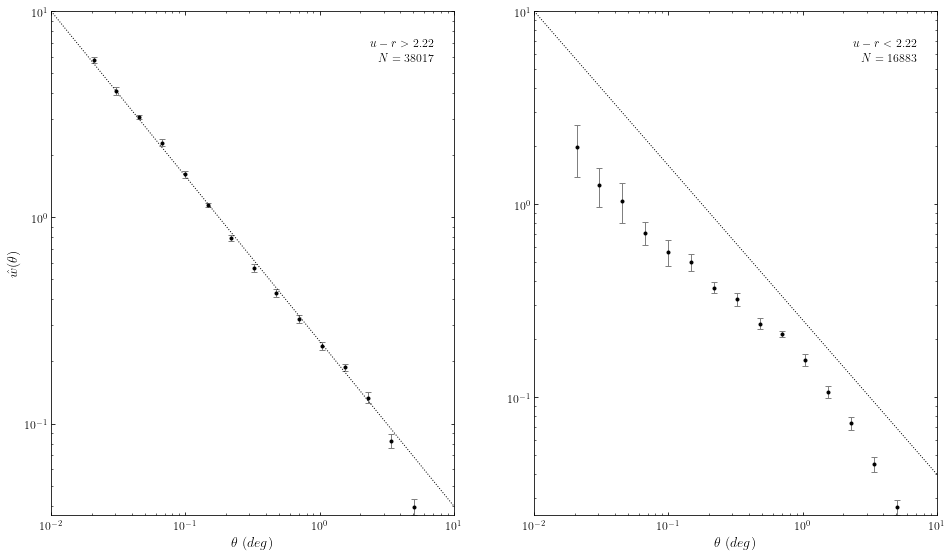

In [97]:
#------------------------------------------------------------
# Plot the results
corr = [r_corr, b_corr]
corr_err = [r_corr_err, b_corr_err]
bootstraps = [r_bootstraps, b_bootstraps]
labels = ['$u-r > 2.22$\n$N=%i$' % len(data_red),
          '$u-r < 2.22$\n$N=%i$' % len(data_blue)]

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

for i in range(2):
    ax = fig.add_subplot(121 + i, xscale='log', yscale='log')

    ax.errorbar(bin_centers, corr[i], corr_err[i],
                fmt='.k', ecolor='gray', lw=1)

    t = np.array([0.01, 10])
    ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)

    ax.text(0.95, 0.95, labels[i],
            ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'$\theta\ (deg)$', fontsize = 14)
    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$', fontsize = 14)

The two-point correlation function of SDSS spectroscopic galaxies in the range 0.08 < z < 0.12, with m < 17.7. This is the same sample for which the luminosity function is computed in figure 4.10. Errors are estimated using ten bootstrap samples. Dotted lines are added to guide the eye and correspond to a power law proportional to $\theta^{-0.8}$. Note that the red galaxies (left panel) are clustered more strongly than the blue galaxies (right panel).

**Example**:  Detection of baryonic acoustic oscillations in the two-point correlation function of galaxies
![alt text](BAOobsv.png "original")

![alt text](CMB.jpg "original")


# Graphical networks and tesselations

* Sometimes the $p$-dimensional distribution of neighbours provides more detailed information about the spatial autocorrelation and clustering structure of a point process than their radial distribution

* The visualization of these connections between nearby point is an important part of **graph theory**

* The **Delaunay triangulation** joins all neighborig point triplets with triangles

* The network of line segments that connects all points without closed loops having the smallest total length is called the **minimal spanning tree (MST)**

* The **Dirichlet (or Voronoi or Thiessen) tessellations** are based on line bisectors perpendicular to the Delaunay line segments, partitioning the space into polygons around the data points.

* Prunning of the long branches of the MST gives a well defined procedure for defining a **hierarchy of spatial clusters**

* The distribution of MST branch lengths or Dirichlet tile areas gives insight into the clustering structure and it is complementary to that provided by second order statistics like K (and related metrics) and J.

In [98]:
from scipy.spatial import Delaunay, delaunay_plot_2d

n=15
points = np.array(list(zip(np.random.random(n), np.random.random(n))))
tri = Delaunay(points)
help(tri)

Help on Delaunay in module scipy.spatial.qhull object:

class Delaunay(_QhullUser)
 |  Delaunay(points, furthest_site=False, incremental=False, qhull_options=None)
 |  
 |  Delaunay(points, furthest_site=False, incremental=False, qhull_options=None)
 |  
 |  Delaunay tessellation in N dimensions.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  points : ndarray of floats, shape (npoints, ndim)
 |      Coordinates of points to triangulate
 |  furthest_site : bool, optional
 |      Whether to compute a furthest-site Delaunay triangulation.
 |      Default: False
 |  
 |      .. versionadded:: 0.12.0
 |  incremental : bool, optional
 |      Allow adding new points incrementally. This takes up some additional
 |      resources.
 |  qhull_options : str, optional
 |      Additional options to pass to Qhull. See Qhull manual for
 |      details. Option "Qt" is always enabled.
 |      Default:"Qbb Qc Qz Qx Q12" for ndim > 4 and "Qbb Qc Qz Q12" otherwise.
 |      Incrementa

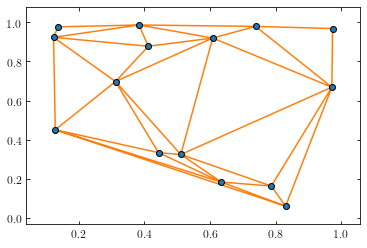

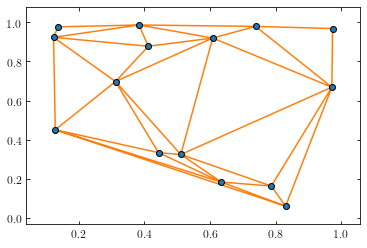

In [99]:
delaunay_plot_2d(tri)

In [49]:
help(tri)

Help on Delaunay in module scipy.spatial.qhull object:

class Delaunay(_QhullUser)
 |  Delaunay(points, furthest_site=False, incremental=False, qhull_options=None)
 |  
 |  Delaunay(points, furthest_site=False, incremental=False, qhull_options=None)
 |  
 |  Delaunay tessellation in N dimensions.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  points : ndarray of floats, shape (npoints, ndim)
 |      Coordinates of points to triangulate
 |  furthest_site : bool, optional
 |      Whether to compute a furthest-site Delaunay triangulation.
 |      Default: False
 |  
 |      .. versionadded:: 0.12.0
 |  incremental : bool, optional
 |      Allow adding new points incrementally. This takes up some additional
 |      resources.
 |  qhull_options : str, optional
 |      Additional options to pass to Qhull. See Qhull manual for
 |      details. Option "Qt" is always enabled.
 |      Default:"Qbb Qc Qz Qx Q12" for ndim > 4 and "Qbb Qc Qz Q12" otherwise.
 |      Incrementa

(20, 3)
(20, 3, 2)


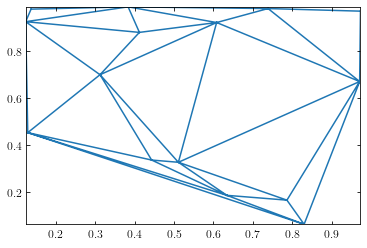

In [102]:
print(np.shape(tri.simplices))
print(np.shape(points[tri.simplices]))
fig, ax = plt.subplots()
ax.triplot(points[:, 0], points[:, 1], tri.simplices)

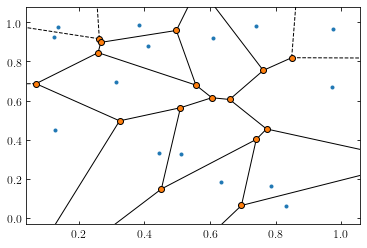

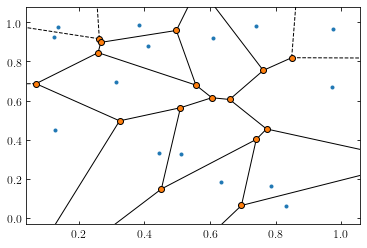

In [103]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
voronoi_plot_2d(vor)

In [104]:
print(help(vor))

Help on Voronoi in module scipy.spatial.qhull object:

class Voronoi(_QhullUser)
 |  Voronoi(points, furthest_site=False, incremental=False, qhull_options=None)
 |  
 |  Voronoi(points, furthest_site=False, incremental=False, qhull_options=None)
 |  
 |  Voronoi diagrams in N dimensions.
 |  
 |  .. versionadded:: 0.12.0
 |  
 |  Parameters
 |  ----------
 |  points : ndarray of floats, shape (npoints, ndim)
 |      Coordinates of points to construct a convex hull from
 |  furthest_site : bool, optional
 |      Whether to compute a furthest-site Voronoi diagram. Default: False
 |  incremental : bool, optional
 |      Allow adding new points incrementally. This takes up some additional
 |      resources.
 |  qhull_options : str, optional
 |      Additional options to pass to Qhull. See Qhull manual
 |      for details. (Default: "Qbb Qc Qz Qx" for ndim > 4 and
 |      "Qbb Qc Qz" otherwise. Incremental mode omits "Qz".)
 |  
 |  Attributes
 |  ----------
 |  points : ndarray of double, 

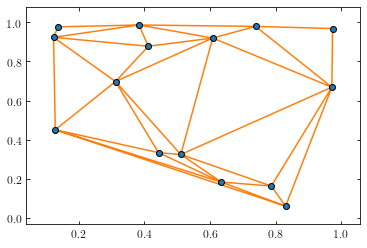

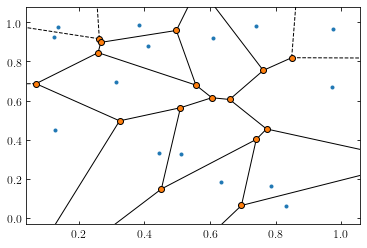

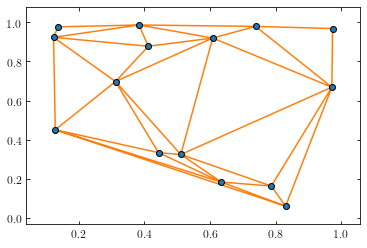

In [105]:
voronoi_plot_2d(vor)
delaunay_plot_2d(tri)

Delaunay triangulation can be used to compute the minimum spanning tree (tree that connects all the vertices together with the minimal total weighting for its edges):
![alt text](Minimum_spanning_tree.svg "original")

In [106]:
from scipy.spatial import ConvexHull
ch = ConvexHull(points)
help(ch)

Help on ConvexHull in module scipy.spatial.qhull object:

class ConvexHull(_QhullUser)
 |  ConvexHull(points, incremental=False, qhull_options=None)
 |  
 |  ConvexHull(points, incremental=False, qhull_options=None)
 |  
 |  Convex hulls in N dimensions.
 |  
 |  .. versionadded:: 0.12.0
 |  
 |  Parameters
 |  ----------
 |  points : ndarray of floats, shape (npoints, ndim)
 |      Coordinates of points to construct a convex hull from
 |  incremental : bool, optional
 |      Allow adding new points incrementally. This takes up some additional
 |      resources.
 |  qhull_options : str, optional
 |      Additional options to pass to Qhull. See Qhull manual
 |      for details. (Default: "Qx" for ndim > 4 and "" otherwise)
 |      Option "Qt" is always enabled.
 |  
 |  Attributes
 |  ----------
 |  points : ndarray of double, shape (npoints, ndim)
 |      Coordinates of input points.
 |  vertices : ndarray of ints, shape (nvertices,)
 |      Indices of points forming the vertices of th

(8, 2, 2)


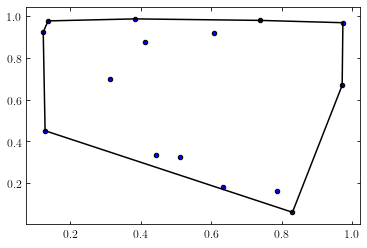

In [107]:
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1])
chpts = points[ch.simplices]
print(np.shape(chpts))
for i, pt in enumerate(chpts):
    ax.plot(pt[:, 0], pt[:, 1], c = 'k')

# Power spectrum

Consider CMB anisotropies and its spherical harmonics expansion

$$\Large \frac{\delta T}{T_0}(\theta, ~\phi) = \sum a_{l, m} Y_{l, m}(\theta, \phi)$$

defining 

$$\Large C_l \equiv \frac{1}{2 l + 1} \sum_m <|a_{l, m}|^2>$$

it is possible to show that for $l \gg 1$, the expectation value for the squared deviation from the average, i.e. the variance, is 

$$\Large \frac{l (l+1) C_l}{2 \pi}$$

![alt text](CMB.jpg "original")
![alt text](Power_Spectrum_Blah.jpg "original")


# Spatial data representation

* A common problem in astrophysics is to search for some point near a given position in the sky in a multidimensional space

* Not obvious way to sort the data to efficiently search for the required point (naive search if $\mathcal{O}(n^2)$)

* For this problem there are a number of multidimensional tree structures which can be used for a nearest neighbor search

## Quad-trees and Oct-trees

* A quad-tree is a simple data structure used to arrange two-dimensional data, in which each tree has exactly four children, representing its four quadrants.

* Tree building takes $\mathcal{O}(n \log(n))$ and search takes $\mathcal{O}(\log(n))$, which is true for all trees below

* An oct-tree is the three-dimensional version of a quad-tree

![alt text](quadtree.png "original")

## kd-trees

* It is the generalization of the quad-tree and oct-trees to higher dimensions, where the strategy of dividing in quadrants becomes unfeasible.

* For $D=10$ dimensions each node of the tree would have $2^{10}=1024$ children, so having just two levels would require about $10^6$ nodes. For $D=100$ and assuming 1 byte per node, we would require $10^{15}$ PB of storage!

* A kd-tree is a binary tree, where each node has only 2 children. 

* The split position is chosen to better represent the data.

![alt text](kdtree.png "original")

In [108]:
from scipy.spatial import cKDTree
np.random.seed(0)
X = np.random.random((1000, 3))
kdt = cKDTree(X) # build the KDTree
%timeit kdt.query(X, k=2) # query for two neighbors!
result = kdt.query(X, k=2)
print(np.shape(result))

780 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
(2, 1000, 2)


In [109]:
X = np.random.random((100000, 3))
kdt = cKDTree(X) # build the KDTree
%timeit kdt.query(X, k=2) # query for two neighbors!
result = kdt.query(X, k=2)
print(np.shape(result))

148 ms ± 6.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(2, 100000, 2)


## Ball-trees

* Because of the rectilinear splitting of the data, as the number of dimensions increase kd-tree also suffer from the "curse of dimensionality"

* Ball-trees use the triangle inequality:

$$ \Large D(x1, x2) + D(x2, x3) \le D(x1, x3)$$

* Rather than building rectilinear nodes in $D$ dimensions, ball-trees build hyperspherical nodes

* Each node is defined by a centroid ${\bf c}_i$  and a radius $r_i$, such that the distance $D({\bf y}, {\bf c}_i) \le r_i$ for every point $\bf y$

* It is easy to show that for every point ${\bf x}$ outside the node and a point ${\bf y}$ inside the node:

$$ \Large D({\bf x}, {\bf c}_i) - r_i \le D({\bf x}, {\bf y}) \le D({\bf x}, {\bf c}_i) + r_i$$

* Using this information we can eliminate a large part of the dataset after a single distance computation


![alt text](balltree.png "original")
![alt text](balls.png "original")

In [110]:
from sklearn.neighbors import BallTree
np.random.seed(0)
X = np.random.random((1000, 3))
bt = BallTree ( X ) # build the Ball Tree
%timeit bt.query(X, k = 2)

1.99 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [111]:
X = np.random.random((100000, 3))
bt = BallTree ( X ) # build the Ball Tree
%timeit bt.query(X, k = 2)

773 ms ± 33.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [112]:
X = np.random.random((100000, 3))
bt = BallTree ( X ) # build the Ball Tree

In [113]:
%timeit bt.query(X[:10], k = 1)

103 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## HEALPix

Hierarchical Equal Area isoLatitude Pixelisation of a 2-sphere.


![alt text](healpix.png "original")

![alt text](healpix_nside.png "original")

See https://healpy.readthedocs.io/en/latest/tutorial.html